In [1]:
import sys
sys.path.append('../')
from os.path import abspath
import matplotlib.pyplot as plt
%matplotlib inline
from digitclutter import generate, io


## Generating samples
Generate a number of clutter samples using default parameters and save them in in a list. A typical element of font set would be `'helvetica-bold'`, or `'arial-bold'` for Windows.

In [2]:
n_samples = 10

clutter_list = []

for i in range(n_samples):
    clutter_list += [generate.sample_clutter(font_set=['arial-bold'])]

## Saving and reading image sets
Save the parameters as a csv

In [3]:
clutter_list = io.name_files('test', clutter_list=clutter_list)

io.save_image_set(clutter_list, 'test/test.csv')

Read the image set

In [4]:
loaded_clutter_list = io.read_image_set('test/test.csv')
print([cl.get_character_list() for cl in clutter_list])
print([cl.get_character_list() for cl in loaded_clutter_list])

[['1'], ['3'], ['4'], ['6'], ['6'], ['5'], ['1'], ['2'], ['6'], ['9']]
[['1'], ['3'], ['4'], ['6'], ['6'], ['5'], ['1'], ['2'], ['6'], ['9']]


## Rendering images
Render the images

In [5]:
for cl in clutter_list:
    cl.render_occlusion()

## Saving as mat files
Save 32x32 versions of the images in a mat file with the labels

In [6]:
fname_list = [cl.fname for cl in clutter_list]
images_dict = io.save_images_as_mat(abspath('test/test.mat'), clutter_list, (32,32), fname_list=fname_list, overwrite_wdir=True)

Using C:\Users\test146user\Documents\GitHub\digitclutter\example_script\temp_workspace as the working directory
Resizing the images
Generating image arrays
Generating target arrays
Images and target arrays saved to C:\Users\test146user\Documents\GitHub\digitclutter\example_script\test\test.mat


Plot as resized image

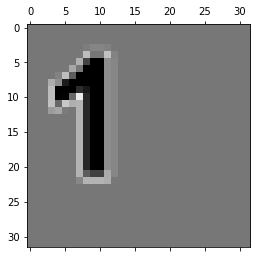

In [7]:
plt.matshow(images_dict['images'][0,:,:,0], cmap = plt.cm.gray, vmin=0, vmax=255)

## Adding debris
Add debris to the images using default debris parameters

In [8]:
debris_array = generate.make_debris(n_samples, n_debris = [10,11])
images_with_debris = generate.add_debris(images_dict['images'], debris_array)

Using C:\Users\test146user\Documents\GitHub\digitclutter\example_script\temp_workspace as the working directory


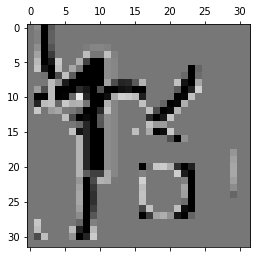

In [9]:
plt.matshow(images_with_debris[0,:,:,0], cmap=plt.cm.gray, vmin=0, vmax=255)